In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager


In [2]:
CORRELTAION_TABLE_PATH = "/cronus_data/avirinchipur/reasoning_for_psych/differential_analysis6/1gram spans cohens Pearson r - Combined.csv"
correlations_df = pd.read_csv(CORRELTAION_TABLE_PATH)
correlations_df.head()

,Term,Cohen's D,p value,Pearson r,p value.1
0,but,-0.548,3.000000e-23,-0.037,0.502
1,and,-0.545,5.000000e-25,-0.033,0.502
2,this,-0.231,1.000000e-04,0.013,0.792
3,due,-0.223,5.000000e-04,0.033,0.502
4,know,-0.214,1.000000e-03,-0.012,0.792


In [3]:
CORRELTAION_TABLE_PATH = "/cronus_data/avirinchipur/reasoning_for_psych/differential_analysis6/1to3gram colloc pocc10 spans cohens Pearson r - Combined.csv"
correlations_df_new = pd.read_csv(CORRELTAION_TABLE_PATH)
correlations_df_new.columns = ['term', 'Explicit (d)', 'p_val_d', 'Depression Severity (r)', 'p_val']
correlations_df_new = correlations_df_new[correlations_df_new.term.str.replace(' ', '').str.isalpha()].reset_index(drop=True)
correlations_df_new.head()

,term,Explicit (d),p_val_d,Depression Severity (r),p_val
0,also,-0.183647,2.853551e-02,0.027081,0.705571
1,and,-0.522490,1.770000e-22,-0.033419,0.627932
2,as,-0.207159,4.655023e-03,0.050067,0.627932
3,because,-0.181146,3.603469e-02,0.039572,0.627932
4,been,0.172445,3.714377e-02,-0.150435,0.000008


In [4]:
# Sort the correlations df in ascending order of Pearson r and then in ascending order of cohen's d
correlations_df = correlations_df.sort_values(by=["Cohen's D", 'Pearson r'], ascending=[False, False]).reset_index(drop=True)

In [5]:
CORRELTAION_TABLE_PATH = "/cronus_data/avirinchipur/reasoning_for_psych/differential_analysis6/1to3gram colloc pocc5 spans cohens Pearson r - Combined.csv"
correlations_df_new2 = pd.read_csv(CORRELTAION_TABLE_PATH)
correlations_df_new2.columns = ['term', 'Explicit (d)', 'p_val_d', 'Depression Severity (r)', 'p_val']
correlations_df_new2 = correlations_df_new2[correlations_df_new2.term.str.replace(' ', '').str.isalpha()].reset_index(drop=True)
correlations_df_new2.head()

,term,Explicit (d),p_val_d,Depression Severity (r),p_val
0,i,0.607898,7.340000e-29,0.008286,0.798152
1,and,-0.517144,5.280000e-22,-0.033419,0.654820
2,but,-0.547211,6.330000e-22,-0.036696,0.654820
3,depressed,0.469893,7.330000e-16,-0.156625,0.000004
4,have been depressed,0.414182,4.530000e-12,0.151727,0.000007


In [6]:
correlations_df.head()

,Term,Cohen's D,p value,Pearson r,p value.1
0,depressed,0.951,2.000000e-62,-0.157,0.000
1,been,0.537,2.000000e-23,-0.150,0.000
2,i,0.533,7.000000e-24,0.008,0.831
3,have,0.527,3.000000e-23,-0.156,0.000
4,not,0.421,8.000000e-15,-0.231,0.000


In [7]:
correlations_df.columns = ['term', 'Explicit (d)', 'p_val_d', 'Depression Severity (r)', 'p_val']

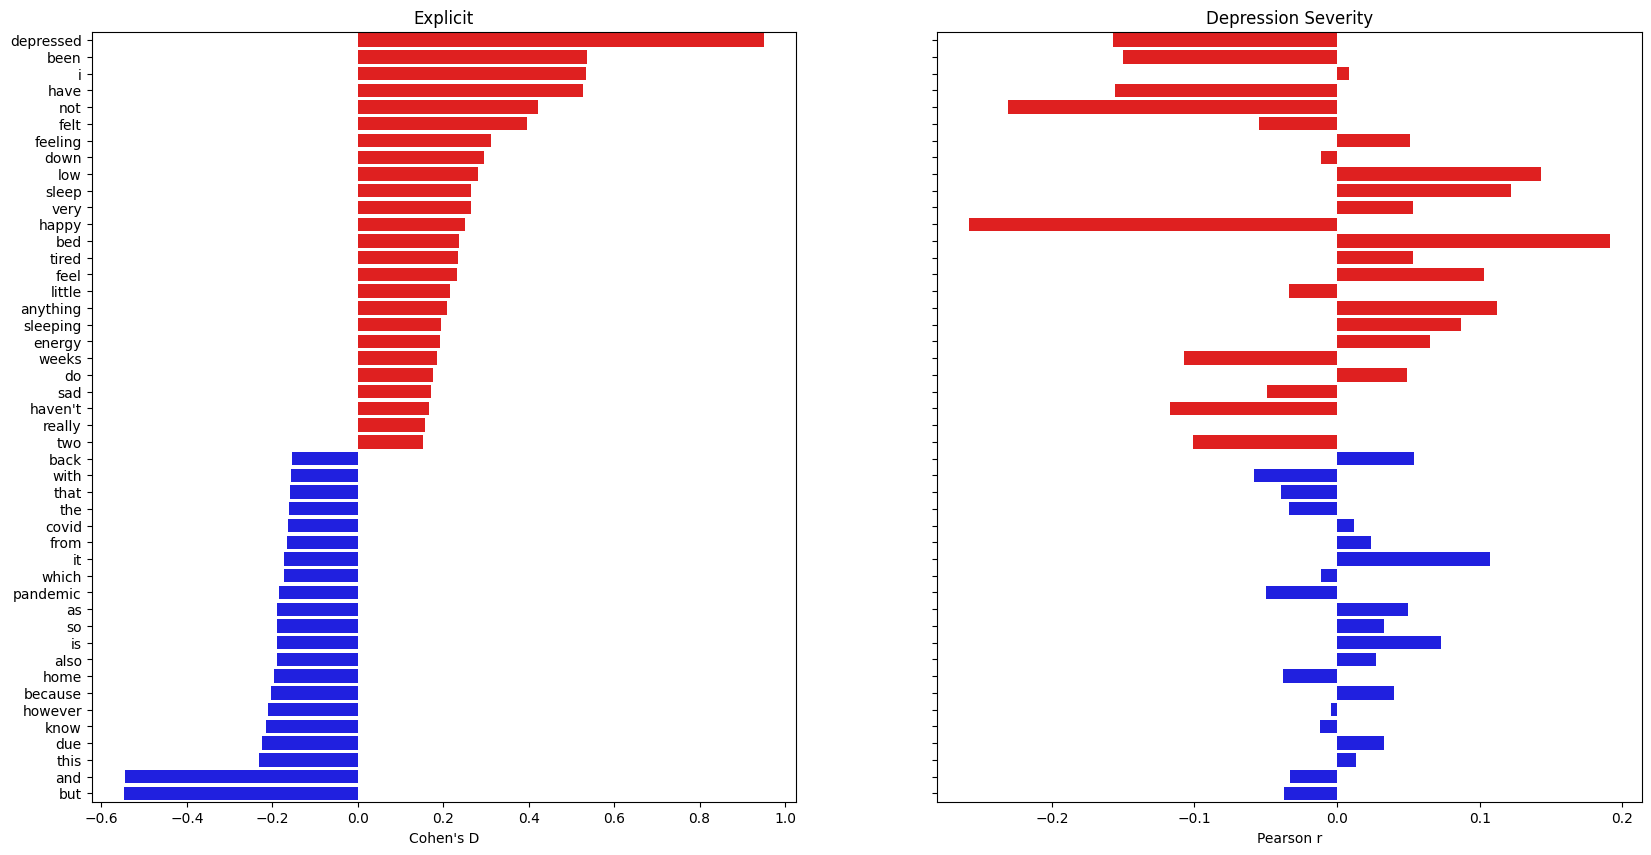

In [8]:
# Draw a bar plot of the "Explicit (d)" column sorted in descending order
# Set the sns scheme to have blue for negative d and red for positive d
# For the same terms, draw a second bar plot to its right with the "Depression Severity (r)" column with shared y-axis
# There should only be one y-axis label in the middle of two plots
fig, ax = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
sns.barplot(x='Explicit (d)', y='term', data=correlations_df, ax=ax[0], palette=['b' if d < 0 else 'r' for d in correlations_df['Explicit (d)']])
sns.barplot(x='Depression Severity (r)', y='term', data=correlations_df, ax=ax[1], palette=['b' if d < 0 else 'r' for d in correlations_df['Explicit (d)']])
# Switch the y-axis labels (term) to be placed in the middle of two plots
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xlabel('Cohen\'s D')
ax[1].set_xlabel('Pearson r')
ax[0].set_title('Explicit')
ax[1].set_title('Depression Severity')
plt.show()

/home/avirinchipur/.local/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


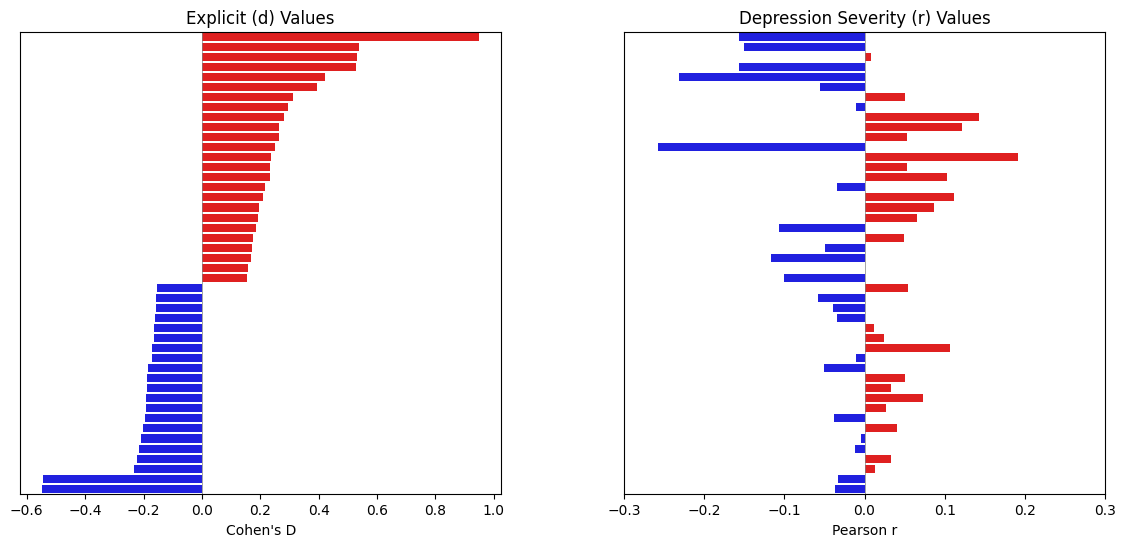

In [9]:
from matplotlib.gridspec import GridSpec

# Creating the plot
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(1, 3, width_ratios=[1, 0.05, 1], wspace=0.15)

# Plot for Explicit (d)
ax0 = fig.add_subplot(gs[0])
sns.barplot(ax=ax0, x='Explicit (d)', y='term', data=correlations_df, palette=['b' if d < 0 else 'r' for d in correlations_df['Explicit (d)']])
ax0.set_title("Explicit (d) Values")
ax0.axvline(0, color='grey', linewidth=0.5)
ax0.set_xlabel("Cohen's D")
ax0.set_ylabel("")
# Turn off y ticks
ax0.set_yticks([])


# Middle axis for terms
ax1 = fig.add_subplot(gs[1])
ax1.set_yticks(range(len(correlations_df)))
ax1.set_yticklabels(len(correlations_df['term'])*[''])
# Move the term a little to the right and down
ax1.yaxis.set_tick_params(pad=-30)
ax1.set_xticks([])
ax1.set_xticklabels([])
ax1.yaxis.set_ticks_position('none')
ax1.set_frame_on(False)

# Plot for Depression Severity (r)
ax2 = fig.add_subplot(gs[2])
sns.barplot(ax=ax2, x='Depression Severity (r)', y='term', data=correlations_df, palette=['b' if d < 0 else 'r' for d in correlations_df['Depression Severity (r)']])
ax2.set_title("Depression Severity (r) Values")
ax2.axvline(0, color='grey', linewidth=0.5)
ax2.set_xlabel("Pearson r")
ax2.set_ylabel("")
ax2.set_yticks([])
# set range
plt.xlim(-0.3, 0.3)

plt.tight_layout()
plt.show()

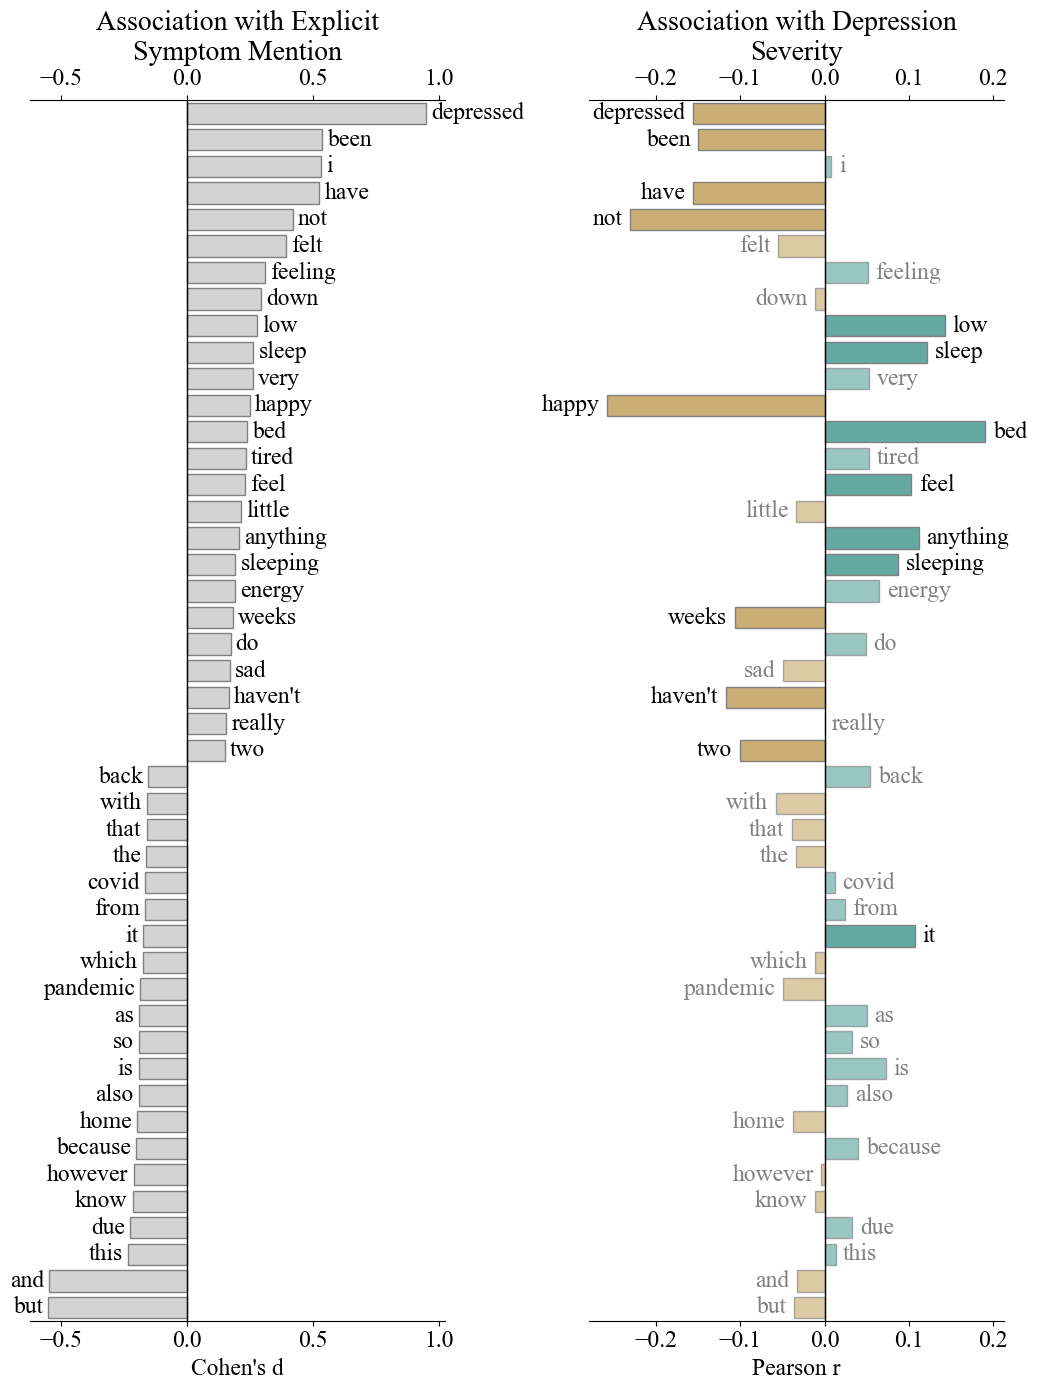

In [10]:

font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
# Create a font properties object
custom_font = font_manager.FontProperties(fname=font_path)

title_fontsize = 20
label_fontsize = 17
ticks_fontsize = 17
text_fontsize = 17
reduced_opacity = 0.65

neg_color = "#d8b365"
pos_color = "#5ab4ac"

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 14), sharey=True)

# Plot for Explicit (d)
barplot_d = sns.barplot(ax=axes[0], x='Explicit (d)', y='term', data=correlations_df, 
            palette=['lightgray' if d < 0 else 'lightgray' for d in correlations_df['Explicit (d)']],
            edgecolor='gray')
axes[0].set_title("Association with Explicit\nSymptom Mention", fontsize=title_fontsize,
                  fontproperties=custom_font)
axes[0].axvline(0, color='black', linewidth=1.0)
axes[0].set_xlabel("Cohen's d", fontsize=label_fontsize, fontproperties=custom_font)
axes[0].tick_params(axis='x', labelsize=ticks_fontsize)
axes[0].set_ylabel("")
axes[0].set_yticks([])
axes[0].spines['left'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# axes[0].spines['top'].set_visible(False)


# Annotate terms next to the bars for Explicit (d)
for i in range(correlations_df.shape[0]):
    value = correlations_df['Explicit (d)'][i]
    if value < 0:
        axes[0].text(value - 0.02, i, correlations_df['term'][i], 
                     color='black', ha="right", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)
    else:
        axes[0].text(value + 0.02, i, correlations_df['term'][i], 
                     color='black', ha="left", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)

# Plot for Depression Severity (r)
# Set opacity of bars to 0.5 for terms with p-value > 0.05
barplot_r = sns.barplot(ax=axes[1], x='Depression Severity (r)', y='term', data=correlations_df, 
            palette=[neg_color if d < 0 else pos_color for d in correlations_df['Depression Severity (r)']],
            edgecolor='gray', dodge=False)
axes[1].set_title("Association with Depression\nSeverity", fontsize=title_fontsize,
                  fontproperties=custom_font)
axes[1].axvline(0, color='black', linewidth=1.0)
axes[1].set_xlabel("Pearson r", fontsize=label_fontsize, fontproperties=custom_font)
axes[1].tick_params(axis='x', labelsize=ticks_fontsize)
axes[1].set_ylabel("")
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# axes[1].spines['top'].set_visible(False)

for i, patch in enumerate(barplot_r.patches):
    alpha = reduced_opacity if correlations_df['p_val'][i] > 0.05 else 1.0
    patch.set_alpha(alpha)

# Annotate terms next to the bars for Depression Severity (r)
for i in range(correlations_df.shape[0]):
    value = correlations_df['Depression Severity (r)'][i]
    color = 'gray' if correlations_df['p_val'][i] > 0.05 else 'black'
    offset_size = 2 if correlations_df['p_val'][i] < 0.05 else 0
    if value < 0:
        axes[1].text(value - 0.009, i, correlations_df['term'][i], 
                     color=color, ha="right", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)
    else:
        axes[1].text(value + 0.009, i, correlations_df['term'][i], 
                    color=color, ha="left", va='center', fontsize=text_fontsize,
                    fontproperties=custom_font)

# Add x-ticks to both top and bottom
for ax in axes:
    ax.tick_params(top=True, bottom=True, labeltop=True, labelbottom=True)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(custom_font)
    ax.tick_params(axis='x', labelsize=ticks_fontsize)
        

plt.tight_layout()
plt.show()  

# # save the plot as svg
# fig.savefig('../data/figures/word_explicit_severity_gpt4.svg', format='svg', dpi=1200, bbox_inches='tight')
# fig.savefig('../data/figures/word_explicit_severity_gpt4.png', format='png', dpi=1200, bbox_inches='tight')

In [11]:
from matplotlib import font_manager

# List available serif fonts
available_fonts = [f.name for f in font_manager.fontManager.ttflist]
print(available_fonts)
print("Arial" in available_fonts)


['STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeTwoSym', 'cmsy10', 'cmtt10', 'DejaVu Sans', 'STIXSizeFourSym', 'cmss10', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'STIXNonUnicode', 'STIXGeneral', 'cmmi10', 'STIXGeneral', 'STIXGeneral', 'DejaVu Sans Mono', 'STIXSizeOneSym', 'STIXSizeOneSym', 'cmr10', 'DejaVu Sans Mono', 'cmb10', 'STIXSizeTwoSym', 'DejaVu Sans', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeFourSym', 'DejaVu Serif', 'cmex10', 'DejaVu Sans', 'DejaVu Serif', 'DejaVu Sans Display', 'DejaVu Serif Display', 'DejaVu Serif', 'Sawasdee', 'Waree', 'Nimbus Mono PS', 'AnjaliOldLipi', 'C059', 'Likhan', 'Waree', 'Laksaman', 'C059', 'KacstOffice', 'Kinnari', 'Laksaman', 'Liberation Sans', 'DejaVu Sans Mono', 'DejaVu Serif', 'Yrsa', 'Nimbus Sans', 'DejaVu Sans', 'FreeSans', 'URW Bookman', 'Nimbus Roman', 'Garuda', 'P052', 'FreeSans', 'Liberation Sans Narrow', 'Liberation Serif', 'Liberation Serif', 'Rasa'

In [12]:
# Sort the correlations df in ascending order of Pearson r and then in ascending order of cohen's d
correlations_df_new = correlations_df_new.sort_values(by=["Explicit (d)", 'Depression Severity (r)'], ascending=[False, False]).reset_index(drop=True)
correlations_df_new2 = correlations_df_new2.sort_values(by=["Explicit (d)", 'Depression Severity (r)'], ascending=[False, False]).reset_index(drop=True)

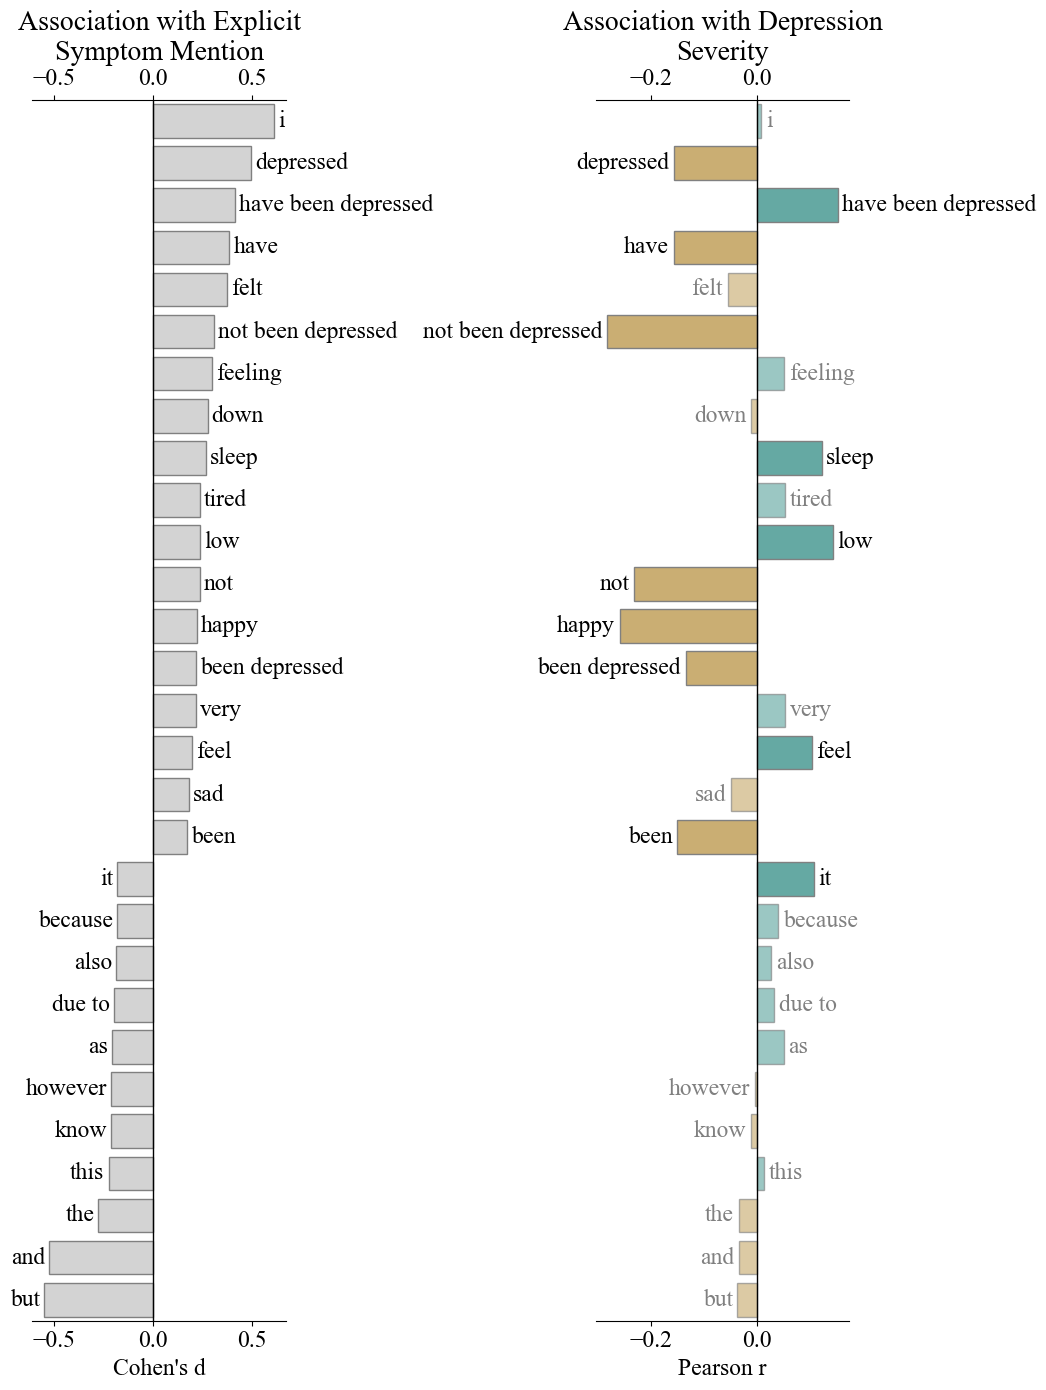

In [13]:

font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
# Create a font properties object
custom_font = font_manager.FontProperties(fname=font_path)

title_fontsize = 20
label_fontsize = 17
ticks_fontsize = 17
text_fontsize = 17
reduced_opacity = 0.65

neg_color = "#d8b365"
pos_color = "#5ab4ac"

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 14), sharey=True)

# Plot for Explicit (d)
barplot_d = sns.barplot(ax=axes[0], x='Explicit (d)', y='term', data=correlations_df_new, 
            palette=['lightgray' if d < 0 else 'lightgray' for d in correlations_df_new['Explicit (d)']],
            edgecolor='gray')
axes[0].set_title("Association with Explicit\nSymptom Mention", fontsize=title_fontsize,
                  fontproperties=custom_font)
axes[0].axvline(0, color='black', linewidth=1.0)
axes[0].set_xlabel("Cohen's d", fontsize=label_fontsize, fontproperties=custom_font)
axes[0].tick_params(axis='x', labelsize=ticks_fontsize)
axes[0].set_ylabel("")
axes[0].set_yticks([])
axes[0].spines['left'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# axes[0].spines['top'].set_visible(False)


# Annotate terms next to the bars for Explicit (d)
for i in range(correlations_df_new.shape[0]):
    value = correlations_df_new['Explicit (d)'][i]
    if value < 0:
        axes[0].text(value - 0.02, i, correlations_df_new['term'][i], 
                     color='black', ha="right", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)
    else:
        axes[0].text(value + 0.02, i, correlations_df_new['term'][i], 
                     color='black', ha="left", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)

# Plot for Depression Severity (r)
# Set opacity of bars to 0.5 for terms with p-value > 0.05
barplot_r = sns.barplot(ax=axes[1], x='Depression Severity (r)', y='term', data=correlations_df_new, 
            palette=[neg_color if d < 0 else pos_color for d in correlations_df_new['Depression Severity (r)']],
            edgecolor='gray', dodge=False)
axes[1].set_title("Association with Depression\nSeverity", fontsize=title_fontsize,
                  fontproperties=custom_font)
axes[1].axvline(0, color='black', linewidth=1.0)
axes[1].set_xlabel("Pearson r", fontsize=label_fontsize, fontproperties=custom_font)
axes[1].tick_params(axis='x', labelsize=ticks_fontsize)
axes[1].set_ylabel("")
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# axes[1].spines['top'].set_visible(False)

for i, patch in enumerate(barplot_r.patches):
    alpha = reduced_opacity if correlations_df_new['p_val'][i] > 0.05 else 1.0
    patch.set_alpha(alpha)

# Annotate terms next to the bars for Depression Severity (r)
for i in range(correlations_df_new.shape[0]):
    value = correlations_df_new['Depression Severity (r)'][i]
    color = 'gray' if correlations_df_new['p_val'][i] > 0.05 else 'black'
    offset_size = 2 if correlations_df_new['p_val'][i] < 0.05 else 0
    if value < 0:
        axes[1].text(value - 0.009, i, correlations_df_new['term'][i], 
                     color=color, ha="right", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)
    else:
        axes[1].text(value + 0.009, i, correlations_df_new['term'][i], 
                    color=color, ha="left", va='center', fontsize=text_fontsize,
                    fontproperties=custom_font)

# Add x-ticks to both top and bottom
for ax in axes:
    ax.tick_params(top=True, bottom=True, labeltop=True, labelbottom=True)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(custom_font)
    ax.tick_params(axis='x', labelsize=ticks_fontsize)
        

plt.tight_layout()
plt.show()  

# # save the plot as svg
# fig.savefig('../data/figures/word_explicit_severity_gpt4.svg', format='svg', dpi=1200, bbox_inches='tight')
# fig.savefig('../data/figures/word_explicit_severity_gpt4.png', format='png', dpi=1200, bbox_inches='tight')

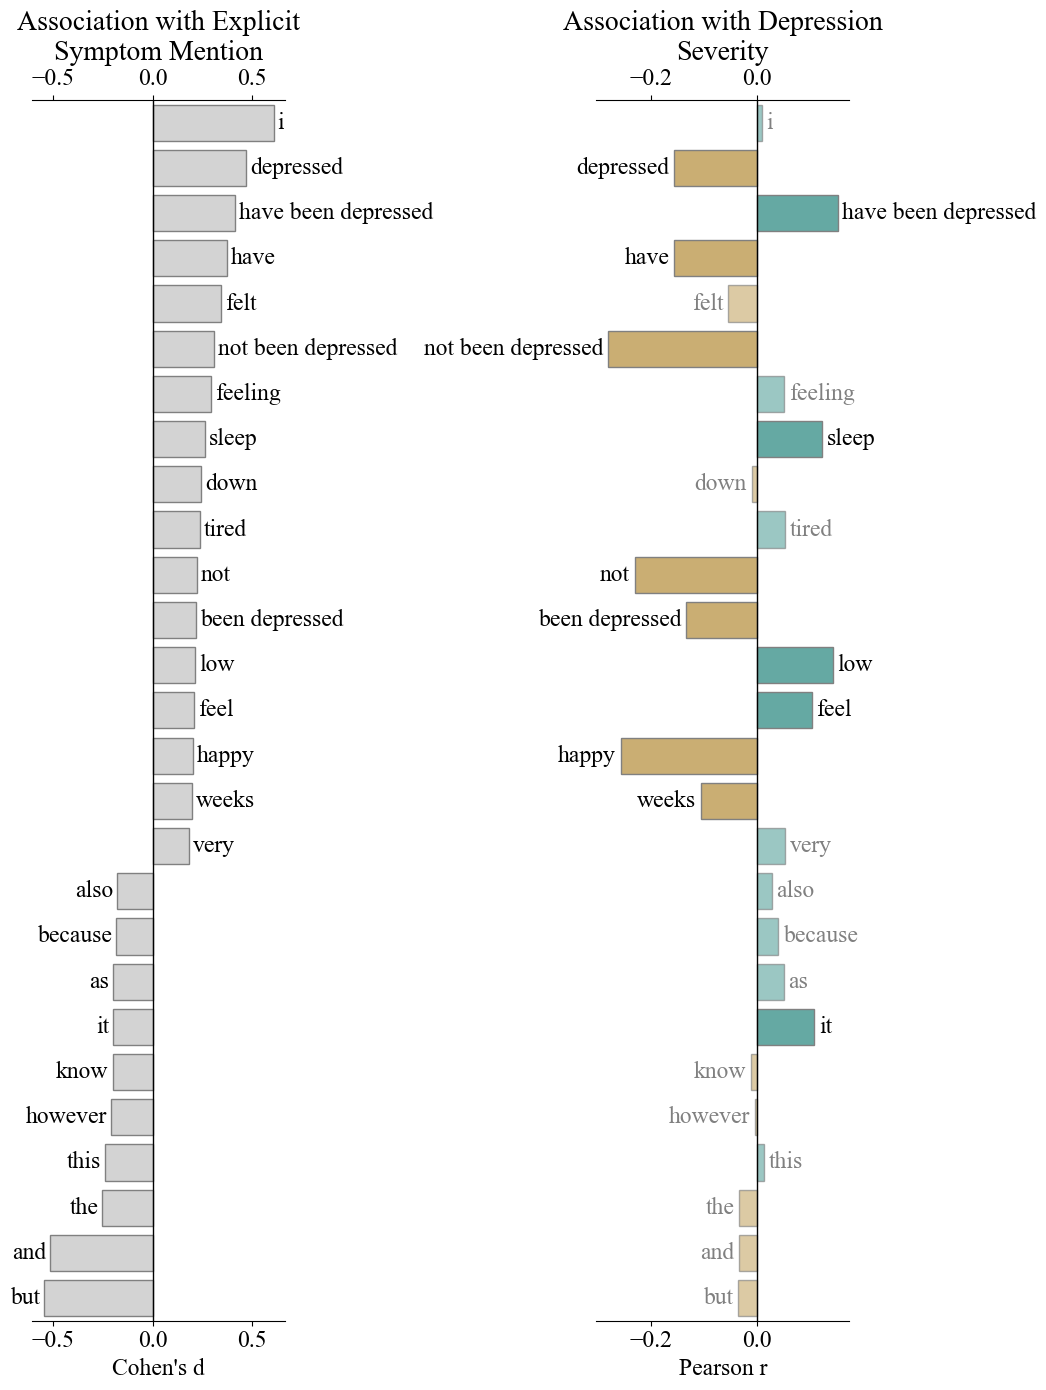

In [14]:

font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
# Create a font properties object
custom_font = font_manager.FontProperties(fname=font_path)

title_fontsize = 20
label_fontsize = 17
ticks_fontsize = 17
text_fontsize = 17
reduced_opacity = 0.65

neg_color = "#d8b365"
pos_color = "#5ab4ac"

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 14), sharey=True)

# Plot for Explicit (d)
barplot_d = sns.barplot(ax=axes[0], x='Explicit (d)', y='term', data=correlations_df_new2, 
            palette=['lightgray' if d < 0 else 'lightgray' for d in correlations_df_new2['Explicit (d)']],
            edgecolor='gray')
axes[0].set_title("Association with Explicit\nSymptom Mention", fontsize=title_fontsize,
                  fontproperties=custom_font)
axes[0].axvline(0, color='black', linewidth=1.0)
axes[0].set_xlabel("Cohen's d", fontsize=label_fontsize, fontproperties=custom_font)
axes[0].tick_params(axis='x', labelsize=ticks_fontsize)
axes[0].set_ylabel("")
axes[0].set_yticks([])
axes[0].spines['left'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# axes[0].spines['top'].set_visible(False)

# Annotate terms next to the bars for Explicit (d)
for i in range(correlations_df_new2.shape[0]):
    value = correlations_df_new2['Explicit (d)'][i]
    if value < 0:
        axes[0].text(value - 0.02, i, correlations_df_new2['term'][i], 
                     color='black', ha="right", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)
    else:
        axes[0].text(value + 0.02, i, correlations_df_new2['term'][i], 
                     color='black', ha="left", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)

# Plot for Depression Severity (r)
# Set opacity of bars to 0.5 for terms with p-value > 0.05
barplot_r = sns.barplot(ax=axes[1], x='Depression Severity (r)', y='term', data=correlations_df_new2, 
            palette=[neg_color if d < 0 else pos_color for d in correlations_df_new2['Depression Severity (r)']],
            edgecolor='gray', dodge=False)
axes[1].set_title("Association with Depression\nSeverity", fontsize=title_fontsize,
                  fontproperties=custom_font)
axes[1].axvline(0, color='black', linewidth=1.0)
axes[1].set_xlabel("Pearson r", fontsize=label_fontsize, fontproperties=custom_font)
axes[1].tick_params(axis='x', labelsize=ticks_fontsize)
axes[1].set_ylabel("")
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# axes[1].spines['top'].set_visible(False)

for i, patch in enumerate(barplot_r.patches):
    alpha = reduced_opacity if correlations_df_new2['p_val'][i] > 0.05 else 1.0
    patch.set_alpha(alpha)

# Annotate terms next to the bars for Depression Severity (r)
for i in range(correlations_df_new2.shape[0]):
    value = correlations_df_new2['Depression Severity (r)'][i]
    color = 'gray' if correlations_df_new2['p_val'][i] > 0.05 else 'black'
    offset_size = 2 if correlations_df_new2['p_val'][i] < 0.05 else 0
    if value < 0:
        axes[1].text(value - 0.009, i, correlations_df_new2['term'][i], 
                     color=color, ha="right", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)
    else:
        axes[1].text(value + 0.009, i, correlations_df_new2['term'][i], 
                    color=color, ha="left", va='center', fontsize=text_fontsize,
                    fontproperties=custom_font)

# Add x-ticks to both top and bottom
for ax in axes:
    ax.tick_params(top=True, bottom=True, labeltop=True, labelbottom=True)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(custom_font)
    ax.tick_params(axis='x', labelsize=ticks_fontsize)
        

plt.tight_layout()
plt.show()  

# # save the plot as svg
# fig.savefig('../data/figures/word_explicit_severity_gpt4.svg', format='svg', dpi=1200, bbox_inches='tight')
# fig.savefig('../data/figures/word_explicit_severity_gpt4.png', format='png', dpi=1200, bbox_inches='tight')

In [15]:
superset = set(["a", "b", "c"])
subset = set(["a", "b"])
print(subset.issubset(superset))

True


In [39]:
def overlap(ngram, usedWords):
    ngram_split_set = set(ngram.split(' '))
    usedWords = sorted(usedWords)
    matched_words = []
    for usedWord in usedWords:
        usedWord_split_set = set(usedWord.split(' '))
        # if ngram_split_set.intersection(usedWord_split_set):
        if ngram_split_set.issubset(usedWord_split_set):
            matched_words.append(usedWord)
    return matched_words
    
def duplicateFilter(rList, wordFreqs, r_idx=0):
    from numpy import isnan
    
    sortedList = sorted(rList, key= lambda f: abs(f[1][r_idx]) if not isnan(f[1][r_idx]) else 0, reverse=True)
    usedWords = set()
    newList = []
    
    for row in sortedList:
        ngram = row[0]
        matched_ngrams = overlap(ngram, usedWords)
        if len(matched_ngrams)>0:
            for match_ngram in matched_ngrams:
                if wordFreqs[ngram] < wordFreqs[match_ngram]:
                    usedWords.add(ngram)
                    newList.append(ngram)
                    break
        else:
            usedWords.add(ngram)
            newList.append(ngram)
    
    # Filter whole content of rList to only to words in newList
    filtered_rList = []
    for idx, item in enumerate(rList):
        if item[0] in newList:
            filtered_rList.append(item)
            
    return filtered_rList

In [40]:
# def duplicateFilter(rList, wordFreqs, maxToCheck = 100, r_idx = 0):
#     """
#     Filters out duplicate words

#     Parameters
#     ----------
#     rList : list
#         list of (word, correl) tuples
#     wordFreqs : dict
#         word - word frequency pairs
#     maxToCheck : :obj:`int`, optional
#         will stop checking after this many in order to speed up operation
#     r_idx : :obj:`int`, optional
#         index of the correlation in the tuple

#     Returns
#     -------
#     newList : list
#         filtered version of rList

#     """
#     #maxToCheck, will stop checking after this many in order to speed up operation
#     from numpy import isnan

#     sortedList = sorted(rList, key= lambda f: abs(f[1][r_idx]) if not isnan(f[1][r_idx]) else 0, reverse=True)
#     usedWords = set()
#     newList = []
#     # pprint(('before filter', sortedList))#debug
#     for (phrase, v) in sortedList:
#         (r, sig, groups, ci, phraseFreq) = v
#         words = phrase.split(' ')

#         # check for keeping:
#         keep = True
#         for i in range(len(words)):
#             word = words[i]
#             if word in usedWords:
#                 ditch = True
#                 for otherWord in words[:i]+words[i+1:]:
#                     if (not otherWord in wordFreqs) or (not word in wordFreqs) or wordFreqs[otherWord] < wordFreqs[word]:
#                         ditch = False
#                         break
#                 keep = keep and not ditch
#         if keep:
#             # print "keeping %s" % phrase
#             newList.append((phrase, v))
#             for word in words:
#                 usedWords.add(word)
#         else:
#             pass
#             # print "ditching %s" % phrase

#     # pprint(('after filter', newList))
#     return newList

In [41]:
# COHEN_TABLE_PATH = "/cronus_data/avirinchipur/reasoning_for_psych/differential_analysis6/1to3gram Pocc5 is_explicit phq9 - Pocc 10 cohens.csv"
# CORRELATION_TABLE_PATH = "/cronus_data/avirinchipur/reasoning_for_psych/differential_analysis6/1to3gram Pocc5 is_explicit phq9 - Pocc 10 Pearson .csv"
COHEN_TABLE_PATH = "/cronus_data/avirinchipur/reasoning_for_psych/differential_analysis6/1to3grams spans is_explicit phq9 pocc10 pmi4 - cohens d.csv"
CORRELATION_TABLE_PATH = "/cronus_data/avirinchipur/reasoning_for_psych/differential_analysis6/1to3grams spans is_explicit phq9 pocc10 pmi4 - phq9.csv"
correlation_df = pd.read_csv(CORRELATION_TABLE_PATH)
cohen_df = pd.read_csv(COHEN_TABLE_PATH).iloc[:, :7]


In [42]:
cohen_df

,is_explicit,D,p,N,CI_l,CI_u,freq
0,but,-0.548440,8.110000e-23,1823,-0.579750,-0.515510,394
1,and,-0.545160,1.510000e-24,1823,-0.576640,-0.512070,1874
2,but i,-0.258340,2.290000e-05,1823,-0.300680,-0.214980,106
3,and i,-0.250990,9.120000e-05,1823,-0.293520,-0.207470,144
4,this,-0.231170,2.030000e-04,1823,-0.274170,-0.187250,327
...,...,...,...,...,...,...,...
64,i,0.532786,2.140000e-23,1823,0.499084,0.564879,3540
65,been,0.537088,4.710000e-23,1823,0.503596,0.568969,1069
66,i have,0.592937,3.290000e-27,1823,0.562335,0.621918,1194
67,been depressed,0.613541,7.200000e-28,1823,0.584084,0.641385,310


In [43]:
# correlation_df.to_csv('/cronus_data/avirinchipur/reasoning_for_psych/differential_analysis6/1to3gram Pocc5 is_explicit phq9 - Pocc 10 Pearson Cohen combined deduplicated.csv', index=False)

In [44]:
correlation_df.columns

Index(['term', 'r', 'p', 'N', 'CI_l', 'CI_u', 'freq'], dtype='object')

In [45]:
wordFreqs = pd.read_csv('/cronus_data/avirinchipur/reasoning_for_psych/differential_analysis6/1to3gram_gpt4_1106_spans_wordFreqs.csv')
wordFreqs

,feature,freq
0,!,22
1,! <newline>,1
2,! <newline> i,1
3,! feeling,1
4,! feeling more,1
...,...,...
64051,“ resume,1
64052,“ resume ”,1
64053,”,1
64054,” normal,1


In [46]:
cohen_df

,is_explicit,D,p,N,CI_l,CI_u,freq
0,but,-0.548440,8.110000e-23,1823,-0.579750,-0.515510,394
1,and,-0.545160,1.510000e-24,1823,-0.576640,-0.512070,1874
2,but i,-0.258340,2.290000e-05,1823,-0.300680,-0.214980,106
3,and i,-0.250990,9.120000e-05,1823,-0.293520,-0.207470,144
4,this,-0.231170,2.030000e-04,1823,-0.274170,-0.187250,327
...,...,...,...,...,...,...,...
64,i,0.532786,2.140000e-23,1823,0.499084,0.564879,3540
65,been,0.537088,4.710000e-23,1823,0.503596,0.568969,1069
66,i have,0.592937,3.290000e-27,1823,0.562335,0.621918,1194
67,been depressed,0.613541,7.200000e-28,1823,0.584084,0.641385,310


In [47]:
# rList = correlation_df[['feature', 'score_phq9', 'p', 'N', 'CI_l', 'CI_u', 'freq']].apply(lambda x: (x[0], (x[1], x[2], x[3], (x[4], x[5]), x[6])), axis=1).tolist()
rList = correlation_df[['term', 'r', 'p', 'N', 'CI_l', 'CI_u', 'freq']].apply(lambda x: (x[0], (x[1], x[2], x[3], (x[4], x[5]), x[6])), axis=1).tolist()
wordFreqs = dict(wordFreqs[['feature', 'freq']].values)
newList = duplicateFilter(rList, wordFreqs, r_idx = 0)
newList = list(map(lambda x: (x[0], round(x[1][0], 2), x[1][1], x[1][2], x[1][3][0], x[1][3][1], x[1][4]), newList))
correlation_df_filtered = pd.DataFrame(newList, columns=['term', 'r', 'p', 'N', 'CI_l', 'CI_u', 'freq'])

In [48]:
# Merge this with the cohen df
correlation_df_filtered.columns = ['term', 'Depression Severity (r)', 'p_val', 'N', 'CI_l', 'CI_u', 'freq']
cohen_df.columns = ['term', 'Explicit (d)', 'p_val_d', 'N', 'CI_l', 'CI_u', 'freq']
merged_df = pd.merge(cohen_df.iloc[:, :3], correlation_df_filtered.iloc[:, :3], on='term', how='inner')
merged_df = merged_df.sort_values(by=["Explicit (d)", 'Depression Severity (r)'], ascending=[False, False]).reset_index(drop=True)

In [49]:
merged_df

,term,Explicit (d),p_val_d,Depression Severity (r),p_val
0,i have been,0.416325,1.880000e-13,0.03,4.853949e-01
1,have been depressed,0.402971,1.520000e-12,0.15,1.390000e-05
2,felt,0.396326,1.760000e-11,-0.06,1.574279e-01
3,depressed over the,0.317512,3.480000e-06,0.01,8.511135e-01
4,feeling,0.311895,5.940000e-07,0.05,1.885568e-01
5,have not been,0.307341,3.440000e-07,-0.28,1.650000e-17
6,have felt,0.304823,1.950000e-06,0.01,8.511135e-01
7,not been depressed,0.303216,1.270000e-06,-0.28,1.650000e-17
8,down,0.295618,4.040000e-06,-0.01,8.511135e-01
9,i have felt,0.292660,4.040000e-06,0.01,8.511135e-01


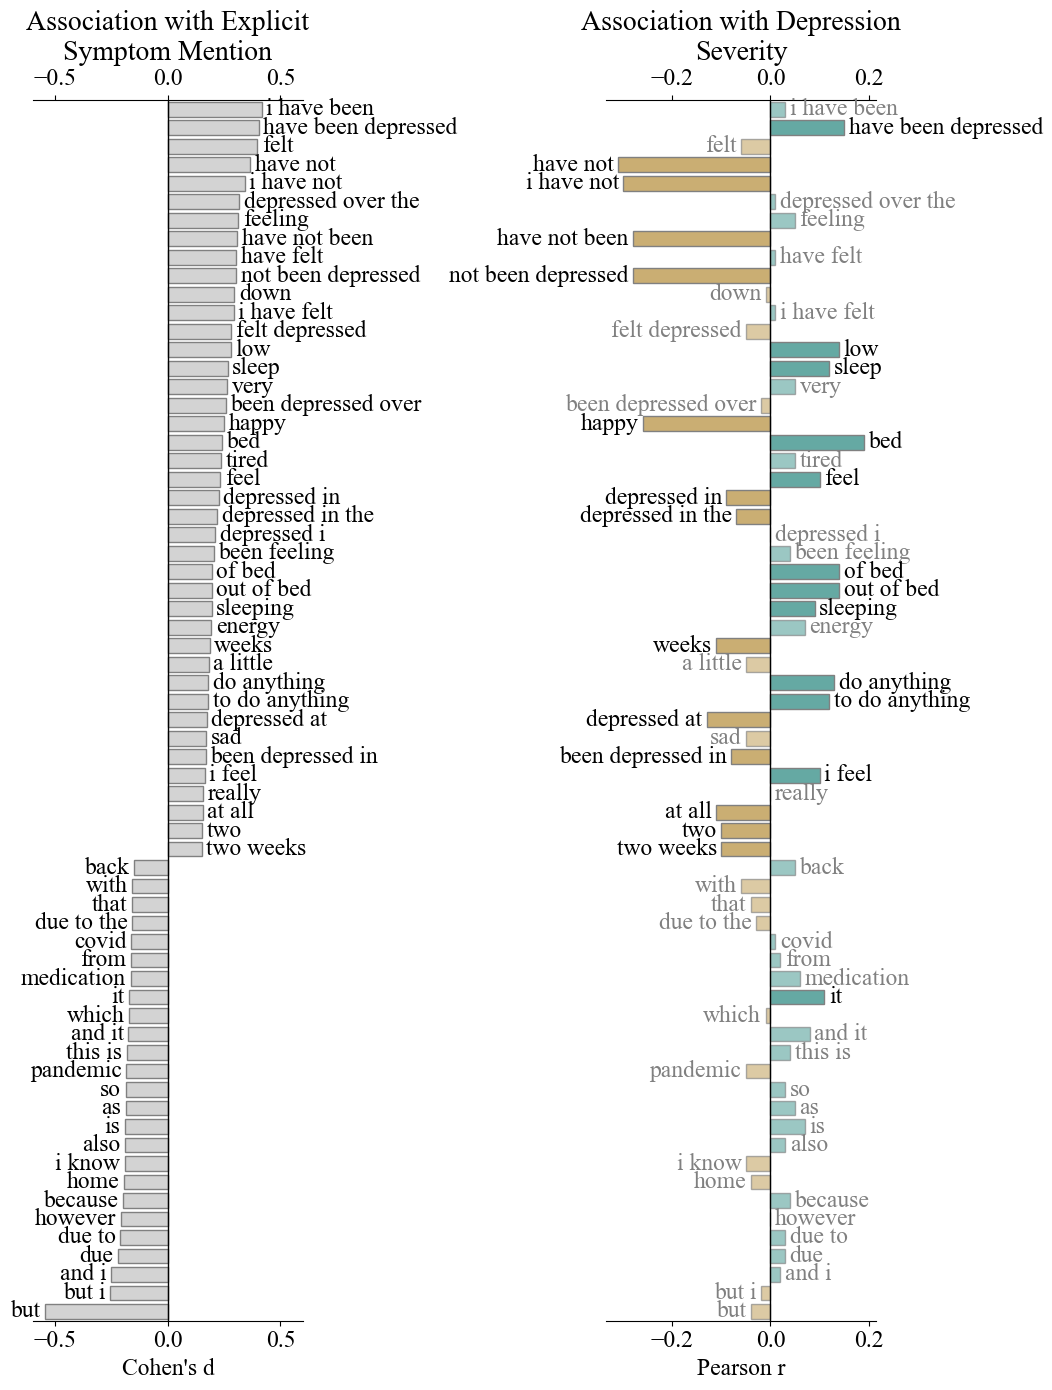

In [42]:

font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
# Create a font properties object
custom_font = font_manager.FontProperties(fname=font_path)

title_fontsize = 20
label_fontsize = 17
ticks_fontsize = 17
text_fontsize = 17
reduced_opacity = 0.65

neg_color = "#d8b365"
pos_color = "#5ab4ac"

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 14), sharey=True)

# Plot for Explicit (d)
barplot_d = sns.barplot(ax=axes[0], x='Explicit (d)', y='term', data=merged_df, 
            palette=['lightgray' if d < 0 else 'lightgray' for d in merged_df['Explicit (d)']],
            edgecolor='gray')
axes[0].set_title("Association with Explicit\nSymptom Mention", fontsize=title_fontsize,
                  fontproperties=custom_font)
axes[0].set_xlim(-0.6, 0.6)
axes[0].axvline(0, color='black', linewidth=1.0)
axes[0].set_xlabel("Cohen's d", fontsize=label_fontsize, fontproperties=custom_font)
axes[0].tick_params(axis='x', labelsize=ticks_fontsize)
axes[0].set_ylabel("")
axes[0].set_yticks([])
axes[0].spines['left'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# axes[0].spines['top'].set_visible(False)

# Annotate terms next to the bars for Explicit (d)
for i in range(merged_df.shape[0]):
    value = merged_df['Explicit (d)'][i]
    if value < 0:
        axes[0].text(value - 0.02, i, merged_df['term'][i], 
                     color='black', ha="right", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)
    else:
        axes[0].text(value + 0.02, i, merged_df['term'][i], 
                     color='black', ha="left", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)

# Plot for Depression Severity (r)
# Set opacity of bars to 0.5 for terms with p-value > 0.05
barplot_r = sns.barplot(ax=axes[1], x='Depression Severity (r)', y='term', data=merged_df, 
            palette=[neg_color if d < 0 else pos_color for d in merged_df['Depression Severity (r)']],
            edgecolor='gray', dodge=False)
axes[1].set_title("Association with Depression\nSeverity", fontsize=title_fontsize,
                  fontproperties=custom_font)
axes[1].axvline(0, color='black', linewidth=1.0)
axes[1].set_xlabel("Pearson r", fontsize=label_fontsize, fontproperties=custom_font)
axes[1].tick_params(axis='x', labelsize=ticks_fontsize)
axes[1].set_ylabel("")
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# axes[1].spines['top'].set_visible(False)

for i, patch in enumerate(barplot_r.patches):
    alpha = reduced_opacity if merged_df['p_val'][i] > 0.05 else 1.0
    patch.set_alpha(alpha)

# Annotate terms next to the bars for Depression Severity (r)
for i in range(merged_df.shape[0]):
    value = merged_df['Depression Severity (r)'][i]
    color = 'gray' if merged_df['p_val'][i] > 0.05 else 'black'
    offset_size = 2 if merged_df['p_val'][i] < 0.05 else 0
    if value < 0:
        axes[1].text(value - 0.009, i, merged_df['term'][i], 
                     color=color, ha="right", va='center', fontsize=text_fontsize,
                     fontproperties=custom_font)
    else:
        axes[1].text(value + 0.009, i, merged_df['term'][i], 
                    color=color, ha="left", va='center', fontsize=text_fontsize,
                    fontproperties=custom_font)

# Add x-ticks to both top and bottom
for ax in axes:
    ax.tick_params(top=True, bottom=True, labeltop=True, labelbottom=True)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(custom_font)
    ax.tick_params(axis='x', labelsize=ticks_fontsize)
        

plt.tight_layout()
plt.show()  

# # save the plot as svg
# fig.savefig('../data/figures/word_explicit_severity_gpt4.svg', format='svg', dpi=1200, bbox_inches='tight')
# fig.savefig('../data/figures/word_explicit_severity_gpt4_1to3gram.png', format='png', dpi=1200, bbox_inches='tight')

/home/avirinchipur/.local/lib/python3.7/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/chronos_data/conda_envs/gpt3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
/home/avirinchipur/.local/lib/python3.7/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/chronos_data/conda_envs/gpt3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1376: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


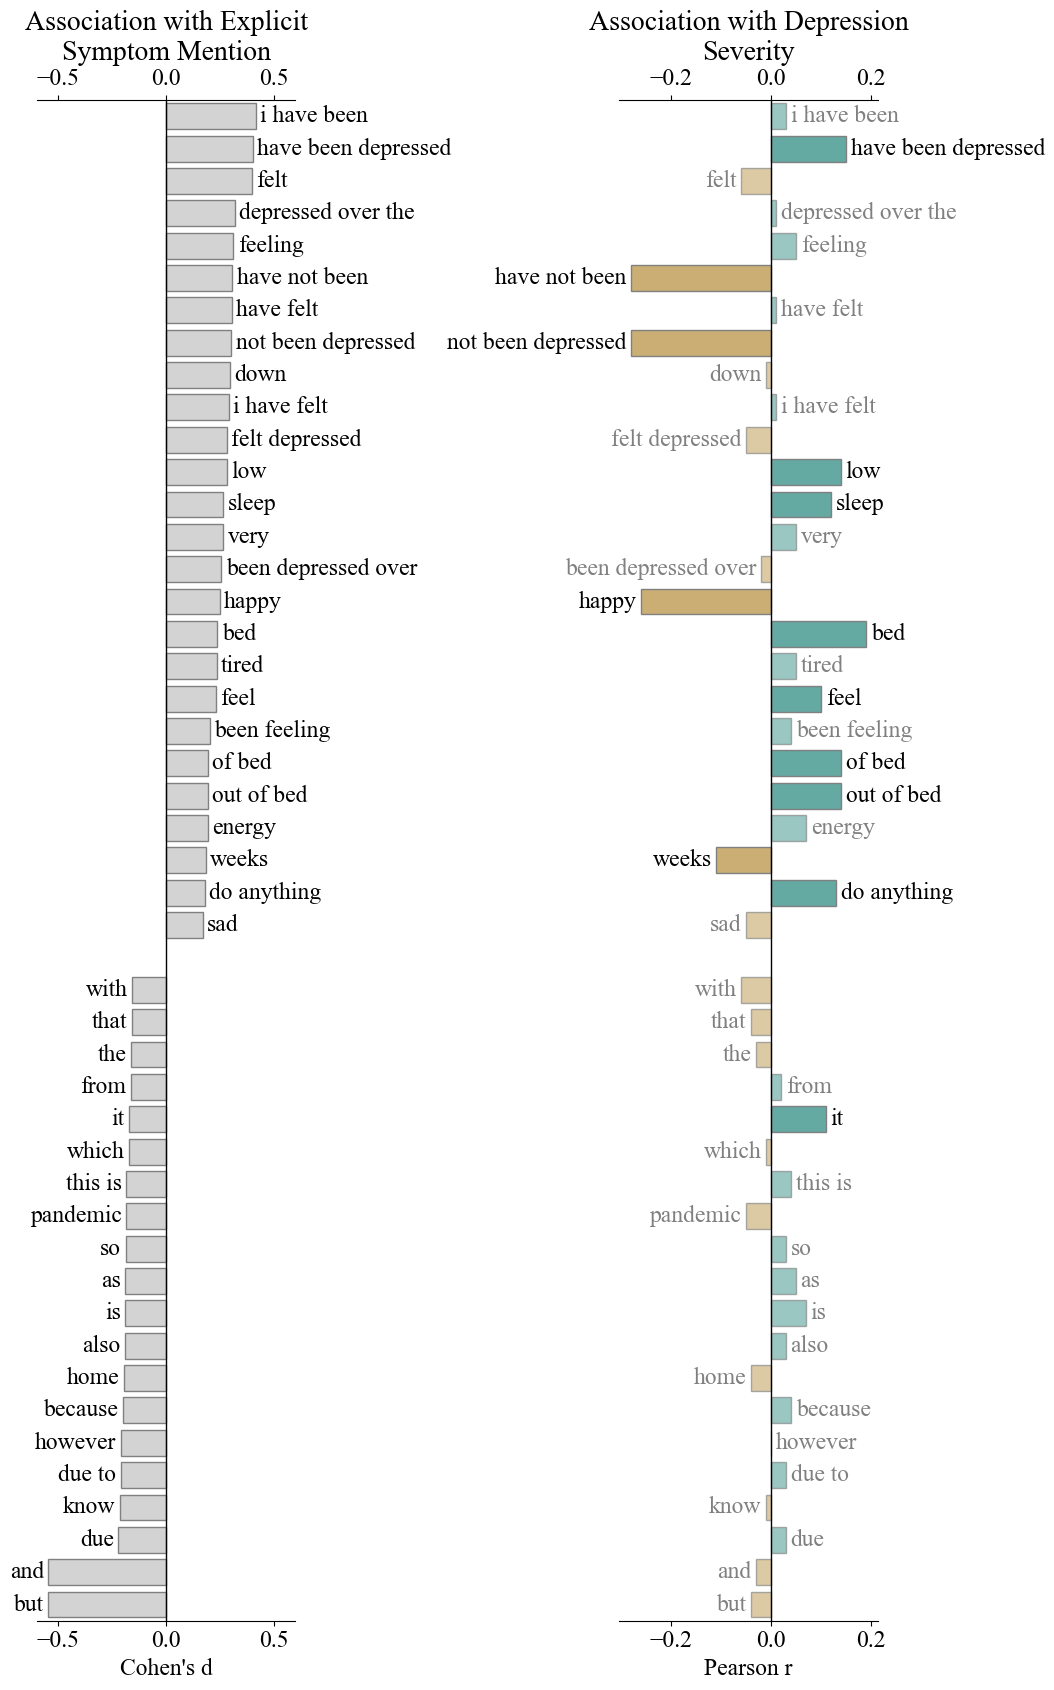

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from math import isnan

# Define the path to your custom font
font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf'
# Create a font properties object
custom_font = font_manager.FontProperties(fname=font_path)

# Define font sizes and other styling parameters
title_fontsize = 20
label_fontsize = 17
ticks_fontsize = 17
text_fontsize = 17
reduced_opacity = 0.65

# Define colors for negative and positive associations
neg_color = "#d8b365"
pos_color = "#5ab4ac"

# ---------------------------
# 1. Prepare `merged_df`
# ---------------------------
# Example sorting by "Explicit (d)" in descending order
merged_df = merged_df.sort_values(by='Explicit (d)', ascending=False).reset_index(drop=True)

# Define the position where you want to insert the blank row
insert_position = 0  # Zero-based index
# Find the insert position by iterating through the rows and finding when the sign of 'Explicit (d)' changes
for i in range(1, merged_df.shape[0]):
    if merged_df['Explicit (d)'][i] * merged_df['Explicit (d)'][i - 1] < 0:
        insert_position = i
        break


# Create a blank row with NaN values for numerical columns and an empty string for 'term'
blank_row = pd.DataFrame({
    'Explicit (d)': [np.nan],
    'Depression Severity (r)': [np.nan],
    'p_val': [np.nan],  # Include other relevant columns if necessary
    'term': ['']  # Empty string or a separator like '---'
})

# Insert the blank row into `merged_df` at the specified position
merged_df = pd.concat([
    merged_df.iloc[:insert_position],
    blank_row,
    merged_df.iloc[insert_position:]
]).reset_index(drop=True)

# ---------------------------
# 2. Plotting
# ---------------------------
# Plotting setup: two subplots side by side with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 17), sharey=True)

# ---------------------------
# Plot for Explicit (d)
# ---------------------------
barplot_d = sns.barplot(
    ax=axes[0],
    x='Explicit (d)',
    y='term',
    data=merged_df,
    palette=['lightgray' if pd.isna(d) else 'lightgray' for d in merged_df['Explicit (d)']],
    edgecolor='gray'
)

# Set title and labels with custom font and sizes
axes[0].set_title(
    "Association with Explicit\nSymptom Mention",
    fontsize=title_fontsize,
    fontproperties=custom_font
)
axes[0].set_xlim(-0.6, 0.6)
axes[0].axvline(0, color='black', linewidth=1.0)
axes[0].set_xlabel(
    "Cohen's d",
    fontsize=label_fontsize,
    fontproperties=custom_font
)
axes[0].tick_params(axis='x', labelsize=ticks_fontsize)
axes[0].set_ylabel("")
axes[0].set_yticks([])
axes[0].spines['left'].set_visible(False)
axes[0].spines['right'].set_visible(False)
# axes[0].spines['top'].set_visible(False)

# Annotate terms next to the bars for Explicit (d)
for i in range(merged_df.shape[0]):
    phrase = merged_df['term'][i]
    value = merged_df['Explicit (d)'][i]
    if pd.isna(value) or phrase.strip() == '':
        # Skip annotation for the blank row
        continue
    if value < 0:
        ha = "right"
        offset = -0.02
    else:
        ha = "left"
        offset = 0.02
    axes[0].text(
        value + offset, i, phrase,
        color='black', ha=ha, va='center',
        fontsize=text_fontsize,
        fontproperties=custom_font
    )

# ---------------------------
# Plot for Depression Severity (r)
# ---------------------------
barplot_r = sns.barplot(
    ax=axes[1],
    x='Depression Severity (r)',
    y='term',
    data=merged_df,
    palette=[
        neg_color if pd.isna(d) else (neg_color if d < 0 else pos_color) 
        for d in merged_df['Depression Severity (r)']
    ],
    edgecolor='gray',
    dodge=False
)

# Set title and labels with custom font and sizes
axes[1].set_title(
    "Association with Depression\nSeverity",
    fontsize=title_fontsize,
    fontproperties=custom_font
)
axes[1].axvline(0, color='black', linewidth=1.0)
axes[1].set_xlabel(
    "Pearson r",
    fontsize=label_fontsize,
    fontproperties=custom_font
)
axes[1].tick_params(axis='x', labelsize=ticks_fontsize)
axes[1].set_ylabel("")
axes[1].set_yticks([])
axes[1].spines['left'].set_visible(False)
axes[1].spines['right'].set_visible(False)
# axes[1].spines['top'].set_visible(False)

# Set opacity based on p-value
for i, patch in enumerate(barplot_r.patches):
    if pd.isna(merged_df['Depression Severity (r)'][i]):
        # If the value is NaN (blank row), make the bar invisible
        patch.set_visible(False)
        continue
    alpha = reduced_opacity if merged_df['p_val'][i] > 0.05 else 1.0
    patch.set_alpha(alpha)

# Annotate terms next to the bars for Depression Severity (r)
for i in range(merged_df.shape[0]):
    phrase = merged_df['term'][i]
    value = merged_df['Depression Severity (r)'][i]
    if pd.isna(value) or phrase.strip() == '':
        # Skip annotation for the blank row
        continue
    color = 'gray' if merged_df['p_val'][i] > 0.05 else 'black'
    if value < 0:
        ha = "right"
        offset = -0.009
    else:
        ha = "left"
        offset = 0.009
    axes[1].text(
        value + offset, i, phrase,
        color=color, ha=ha, va='center',
        fontsize=text_fontsize,
        fontproperties=custom_font
    )

# ---------------------------
# Function to Add Transition Dots (Now Ignored)
# ---------------------------
# Removed as per user request

# ---------------------------
# Final Plot Adjustments
# ---------------------------
# Add x-ticks to both top and bottom
for ax in axes:
    ax.tick_params(top=True, bottom=True, labeltop=True, labelbottom=True)
    for tick in ax.get_xticklabels():
        tick.set_fontproperties(custom_font)
    ax.tick_params(axis='x', labelsize=ticks_fontsize)

plt.tight_layout()
plt.show()

# # Uncomment the lines below to save the plot as SVG and PNG
# fig.savefig('../data/figures/word_explicit_severity_gpt4.svg', format='svg', dpi=1200, bbox_inches='tight')
fig.savefig('../data/figures/word_explicit_severity_gpt4_1to3gram_pmi4.pdf', format='pdf', dpi=1200, bbox_inches='tight')